# How can we control the increasing number of accidents in New York?

In [2]:
import json
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy

## Introduction

**Business Context.** The city of New York has seen a rise in the number of accidents on the roads in the city. They would like to know if the number of accidents have increased in the last few weeks. For all the reported accidents, they have collected details for each accident and have been maintaining records for the past year and a half (from January 2018 to August 2019). 

The city has contracted you to build visualizations that would help them identify patterns in accidents, which would help them take preventive actions to reduce the number of accidents in the future. They have certain parameters like borough, time of day, reason for accident, etc. Which they care about and which they would like to get specific information on.

**Business Problem.** Your task is to format the given data and provide visualizations that would answer the specific questions the client has, which are mentioned below.

**Analytical Context.** You are given a CSV file (stored in the already created ```data``` folder) containing details about each accident like date, time, location of the accident, reason for the accident, types of vehicles involved, injury and death count, etc. The delimiter in the given CSV file is `;` instead of the default `,`. You will be performing the following tasks on the data:

1. Extract additional borough data stored in a JSON file
2. Read, transform, and prepare data for visualization
3. Perform analytics and construct visualizations of the data to identify patterns in the dataset
        
The client has a specific set of questions they would like to get answers to. You will need to provide visualizations to accompany these:

1. How have the number of accidents fluctuated over the past year and a half? Have they increased over the time?
2. For any particular day, during which hours are accidents most likely to occur?
3. Are there more accidents on weekdays than weekends?
4. What are the accidents count-to-area ratio per borough? Which boroughs have disproportionately large numbers of accidents for their size?
5. For each borough, during which hours are accidents most likely to occur?
6. What are the top 5 causes of accidents in the city? 
7. What types of vehicles are most involved in accidents per borough?
8. What types of vehicles are most involved in deaths?

## Fetching the relevant data

The client has requested analysis of the accidents-to-area ratio for boroughs. Borough data is stored in a JSON file in the ```data``` folder.

### Question:

Use the function ```json.load()``` to load the file ```borough_data.json``` as a dictionary.

**Answer.** One possible solution is given below:

In [3]:
with open('data/borough_data.json') as f:
    borough_data=json.load(f)
    
borough_datap=pd.DataFrame(borough_data)
borough_datap=borough_datap.transpose().reset_index().drop("index",axis=1)

### Question:

Similarly, use the pandas function ```read_csv()``` to load the file ```accidents.csv``` as a DataFrame. Name this DataFrame ```df```. 

**Answer.** One possible solution is given below:

In [4]:
with open('data/accidents.csv') as f:
    df=pd.read_csv(f, delimiter=';')

## Overview of the data

Let's go through the columns present in the dataframe:

In [5]:


df

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,Unspecified,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,Unspecified,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238517,01/20/2018,15:00,QUEENS,11436.0,40.685356,-73.797230,LINDEN BOULEVARD,0,0,0,...,Unspecified,NaN,NaN,NaN,3832275,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN
238518,01/04/2018,14:00,BRONX,10452.0,40.845180,-73.914170,JEROME AVENUE,0,0,0,...,NaN,NaN,NaN,NaN,3822315,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN
238519,01/20/2018,13:05,BRONX,10462.0,40.831210,-73.850876,CASTLE HILL AVENUE,0,0,0,...,Unspecified,NaN,NaN,NaN,3832513,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN
238520,01/29/2018,17:45,QUEENS,11377.0,40.757250,-73.904854,31 AVENUE,0,0,0,...,Unspecified,NaN,NaN,NaN,3837608,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN


We have the following columns

1. **BOROUGH**: The borough in which the accident occured
2. **COLLISION_ID**: A unique identifier for this collision
3. **CONTRIBUTING FACTOR VEHICLE (1, 2, 3, 4, 5)**: Reasons for the accident
4. **CROSS STREET NAME**: Nearest cross street to the place of accidents
5. **DATE**: Date of the accident
6. **TIME**: Time of accident
7. **LATITUDE**: Latitude of the accident
8. **LONGITUDE**: Longitude of the accident
9. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) INJURED**: Category wise injury
10. **NUMBER OF (CYCLISTS, MOTORISTS, PEDESTRIANS) KILLED**: Category wise death
11. **ON STREET NAME**: Street where the accident occured
13. **VEHICLE TYPE CODE (1, 2, 3, 4, 5)**: Types of vehicles involved in the accident
14. **ZIP CODE**: zip code of the accident location

### Exercise 1 (30 min):

Since 2014, New York City has been implementing a road safety plan named [Vision Zero](https://www1.nyc.gov/content/visionzero/pages/). It aims to reduce the number of traffic deaths to *zero* by the end of 2024. The plan is creating new and enhancing current safety measures, some of these include:

- [ ] Automated pedestrian detection
- [ ] Road safety audits at high risk locations
- [ ] Expansion in the cycle track network
- [ ] Targeted education and awareness initiatives
- [ ] Creation of pedestrian refuge islands
- [ ] Launch Integrated Data-Driven Speed Reducer Program (speed humps & speed cushions)

Which of these initiatives could directly benefit from an analysis of the data provided? Check all that apply.

**Note:** You can create check marks by double-clicking this cell and adding an ```[x]``` in the corresponding lines. 

**Answer.**

- [ ] Automated pedestrian detection


- [x] Road safety audits at high risk locations


- [ ] Expansion in the cycle track network


- [x] Targeted education and awareness initiatives


- [ ] Creation of pedestrian refuge islands


- [x] Launch Integrated Data-Driven Speed Reducer Program (speed humps & speed cushions)


Let's go ahead and answer each of the client's questions.

## Answering the client's questions

### Exercise 2 (45 min):

Group the available data on a monthly basis and generate a line plot of accidents over time. Has the number of accidents increased over the past year and a half?

**Hint**: You may find the pandas functions ```to_datetime()``` and ```dt.to_period()``` useful.

**Answer.**

In [6]:
df["DATEM"]=pd.to_datetime(df["DATE"]).dt.to_period("M")

df
##Taking a look of the data
#COLLISION_ID has an unique identifier for each collision, so if I count this i will know the number of accidents

,DATE,TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,...,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,DATEM
0,09/26/2018,12:12,BRONX,10454.0,40.808987,-73.911316,NaN,0,0,0,...,NaN,NaN,NaN,3988123,Sedan,NaN,NaN,NaN,NaN,2018-09
1,09/25/2018,16:30,BROOKLYN,11236.0,40.636005,-73.912510,FLATLANDS AVENUE,1,0,0,...,NaN,NaN,NaN,3987962,Sedan,NaN,NaN,NaN,NaN,2018-09
2,08/22/2019,19:30,QUEENS,11101.0,40.755490,-73.939530,NaN,0,0,0,...,NaN,NaN,NaN,4193132,Sedan,NaN,NaN,NaN,NaN,2019-08
3,09/23/2018,13:10,QUEENS,11367.0,NaN,NaN,MAIN STREET,0,0,1,...,NaN,NaN,NaN,3985962,Bike,Station Wagon/Sport Utility Vehicle,NaN,NaN,NaN,2018-09
4,08/20/2019,22:40,BRONX,10468.0,40.868336,-73.901270,NaN,0,0,0,...,NaN,NaN,NaN,4192111,Sedan,Sedan,NaN,NaN,NaN,2019-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238517,01/20/2018,15:00,QUEENS,11436.0,40.685356,-73.797230,LINDEN BOULEVARD,0,0,0,...,NaN,NaN,NaN,3832275,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,2018-01
238518,01/04/2018,14:00,BRONX,10452.0,40.845180,-73.914170,JEROME AVENUE,0,0,0,...,NaN,NaN,NaN,3822315,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,NaN,2018-01
238519,01/20/2018,13:05,BRONX,10462.0,40.831210,-73.850876,CASTLE HILL AVENUE,0,0,0,...,NaN,NaN,NaN,3832513,PASSENGER VEHICLE,SPORT UTILITY / STATION WAGON,NaN,NaN,NaN,2018-01
238520,01/29/2018,17:45,QUEENS,11377.0,40.757250,-73.904854,31 AVENUE,0,0,0,...,NaN,NaN,NaN,3837608,SPORT UTILITY / STATION WAGON,PASSENGER VEHICLE,NaN,NaN,NaN,2018-01


Text(0, 0.5, 'Accidents')

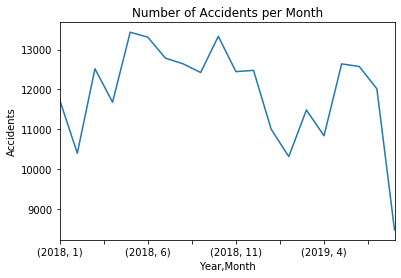

In [7]:
##First possible solution
df["Month"]=df["DATEM"].apply(lambda x: x.month)
df["Year"]=df["DATEM"].apply(lambda x: x.year)
gropu=df.groupby(["Year","Month"]).count()
gropu["COLLISION_ID"].plot()
plt.title("Number of Accidents per Month")
plt.ylabel("Accidents")

Text(0, 0.5, 'Accidents')

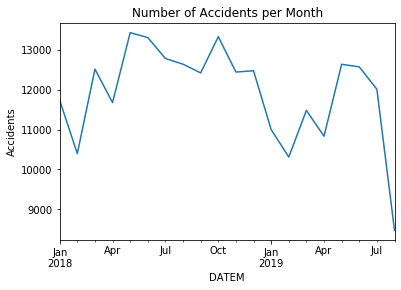

In [8]:
##Second possible solution
gropu=df.groupby("DATEM").count()
#sns.lineplot(x=gropu["COLLISION_ID"].index.values,y=gropu["COLLISION_ID"].values)
gropu["COLLISION_ID"].plot()
plt.title("Number of Accidents per Month")
plt.ylabel("Accidents")

In [9]:
gropu2=gropu.copy()
gropu2=gropu2.reset_index()
Prov_Df=pd.DataFrame()
Prov_Df["2019"]=gropu2[(gropu2["DATEM"].apply(lambda x: x.month)<=6) & (gropu2["DATEM"].apply(lambda x: x.year)==2019)]["COLLISION_ID"].reset_index(drop=True)
Prov_Df["2018"]=gropu2[(gropu2["DATEM"].apply(lambda x: x.month)<=6) & (gropu2["DATEM"].apply(lambda x: x.year)==2018)]["COLLISION_ID"].reset_index(drop=True)
#The data is already sorted by year and month so we don't have to sort it again
Prov_Df["Diff"]=Prov_Df["2018"]-Prov_Df["2019"]
Prov_Df
##Here we clearly see how the number of accidents have decrease in the last year if we compare the first 6 months of each year

,2019,2018,Diff
0,11000,11735,735
1,10310,10395,85
2,11482,12519,1037
3,10833,11679,846
4,12642,13438,796
5,12577,13314,737


### Exercise 3 (20 min):

From the plot above, which months seem to have the least number of accidents? What do you think are the reasons behind this?

**Answer.**

In [68]:

gropu["Year"]=gropu.index.year
gropu["Month"]=gropu.index.month
gropu[["COLLISION_ID","Month","Year"]].sort_values(by=["COLLISION_ID"])

,COLLISION_ID,Month,Year
DATEM,,,
2019-08,8466,8,2019
2019-02,10310,2,2019
2018-02,10395,2,2018
2019-04,10833,4,2019
2019-01,11000,1,2019
2019-03,11482,3,2019
2018-04,11679,4,2018
2018-01,11735,1,2018
2019-07,12014,7,2019


The first 4 months of each year is when there are less accidents, in February it is because it has 28 days and respect to the other months it must be because it is winter season, so there are less people transiting on the street

### Exercise 4 (40 min):

How does the number of accidents vary throughout a single day? Create a new column `HOUR` based on the data from the `TIME` column, then plot a bar graph of the distribution per hour throughout the day.

**Hint:** You may find the function ```dt.hour``` useful. 

**Answer.**

Text(0, 0.5, 'Accidents')

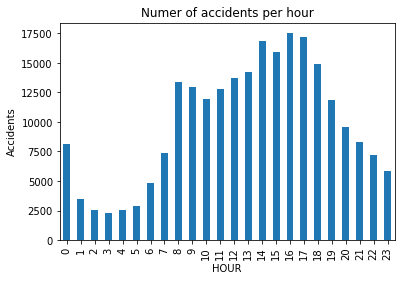

In [11]:
df["HOUR"]=pd.to_datetime(df["TIME"]).dt.hour
HOUR_GROUP=df.groupby("HOUR").count()
HOUR_GROUP["COLLISION_ID"].plot.bar()
plt.title("Number of accidents per hour")
plt.ylabel("Accidents")

### Exercise 5 (15 min):

In the above question we have aggregated the number accidents per hour disregarding the date and place of ocurrence. Which criticism would you give to this approach?

**Answer.**

### Exercise 6:

How does the number of accidents vary throughout a single week? Plot a bar graph based on the accidents count by day of the week.

**Hint:** You may find the function ```dt.weekday``` useful.

Text(0.5, 0, 'day of the week')

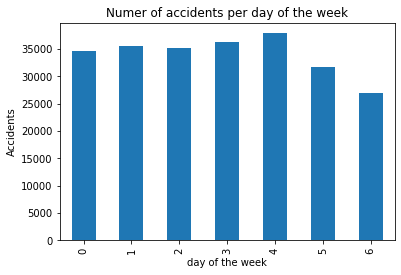

In [13]:
df["DATE"]=pd.to_datetime(df["DATE"])
df["WEEK"]=df["DATE"].dt.weekday
WEEK_GROUP=df.groupby("WEEK").count()
WEEK_GROUP["COLLISION_ID"].plot.bar()
plt.title("Number of accidents per day of the week")
plt.ylabel("Accidents")
plt.xlabel("day of the week")

**Answer.**

### Exercise 7 (40 min):

Plot a bar graph of the total number of accidents in each borough, as well as one of the accidents per square mile per borough. What can you conclude?

**Hint:** You may want to update some of the keys in the borough dictionary to match the names in the dataframe. 

**Answer.**

In [14]:
df["BOROUGH"].unique()

array(['BRONX', 'BROOKLYN', 'QUEENS', 'MANHATTAN', 'STATEN ISLAND'],
      dtype=object)

In [15]:
borough_datap["name"]

0        the bronx
1         brooklyn
2        manhattan
3           queens
4    staten island
Name: name, dtype: object

In [16]:
borough_short_dict = {
    "the bronx": "BRONX",
    "brooklyn": "BROOKLYN",
    "manhattan": "MANHATTAN",
    "queens": "QUEENS",
    "staten island": "STATEN ISLAND"
}
borough_datap["name"]=borough_datap["name"].apply(lambda x: borough_short_dict[x])


Text(0, 0.5, 'Accidents')

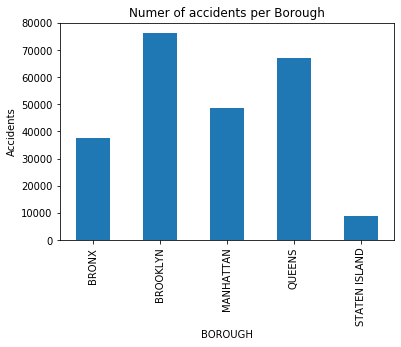

In [17]:
#borough_datap

BOROUGH_GROUP=df.groupby("BOROUGH").count()
BOROUGH_GROUP["COLLISION_ID"].plot.bar()
plt.title("Number of accidents per Borough")
plt.ylabel("Accidents")

,DATE,TIME,ZIP CODE,LATITUDE,LONGITUDE,ON STREET NAME,NUMBER OF PEDESTRIANS INJURED,NUMBER OF PEDESTRIANS KILLED,NUMBER OF CYCLIST INJURED,NUMBER OF CYCLIST KILLED,...,VEHICLE TYPE CODE 5,DATEM,Month,Year,HOUR,WEEK,name,population,area,ACC_per_Mile
0,37709,37709,37706,36192,36192,23417,37709,37709,37709,37709,...,116,37709,37709,37709,37709,37709,BRONX,1.47116e+06,42.1,895.701
1,76253,76253,76253,74789,74789,46406,76253,76253,76253,76253,...,294,76253,76253,76253,76253,76253,BROOKLYN,2.64877e+06,70.82,1076.72
2,48749,48749,48746,46454,46454,31952,48749,48749,48749,48749,...,71,48749,48749,48749,48749,48749,MANHATTAN,1.66473e+06,22.83,2135.3
3,67120,67120,67057,65692,65692,46120,67120,67120,67120,67120,...,250,67120,67120,67120,67120,67120,QUEENS,2.35858e+06,108.53,618.447
4,8691,8691,8690,8417,8417,6023,8691,8691,8691,8691,...,22,8691,8691,8691,8691,8691,STATEN ISLAND,479458,58.37,148.895


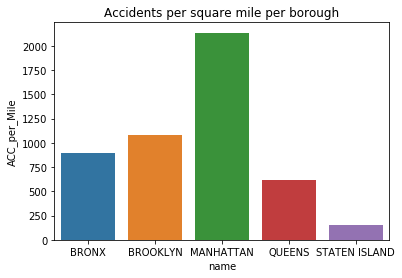

In [18]:
merged_stats = pd.merge(
    left=BOROUGH_GROUP,
    right=borough_datap,
    left_on=BOROUGH_GROUP.index,right_on= "name",
    how="inner",
)
#merged_stats=merged_stats.drop(["name"],axis=1)

merged_stats["ACC_per_Mile"]=merged_stats["COLLISION_ID"]/merged_stats["area"]


ax = sns.barplot(x="name", y="ACC_per_Mile", data=merged_stats).set_title('Accidents per square mile per borough')
merged_stats

We can conclude that the borough with the highest number of accidents is the Brooklyn, but if we add the sizes of the boroughs to this analysis, we can see that the place where the most accidents occur per mile is in Manhattan.

### Exercise 8 (40 min):

Which hours have the most accidents for each borough? Plot a bar graph for each borough showing the number of accidents for each hour of the day.

**Hint:** You can use ```sns.FacetGrid``` to create a grid of plots with the hourly data of each borough. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


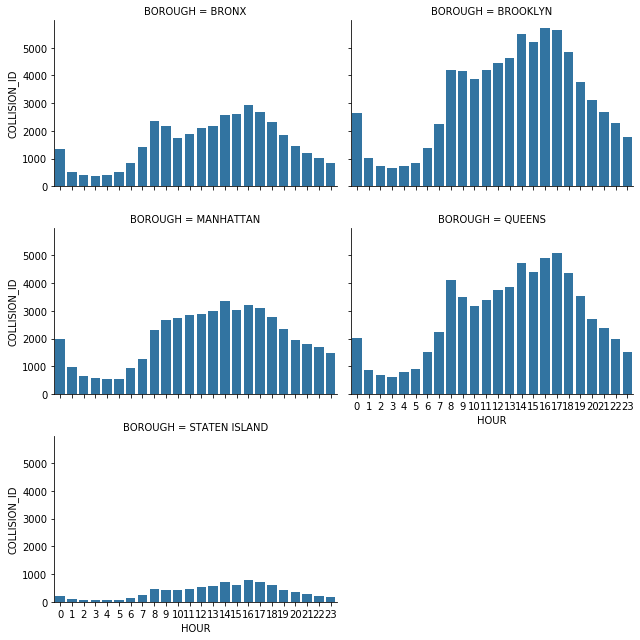

In [19]:
BOROUGH_HOUR_GROUP=df.groupby(["BOROUGH","HOUR"]).count().reset_index()
#for name,group in BOROUGH_HOUR_GROUP:
#    print(name)
g = sns.FacetGrid(BOROUGH_HOUR_GROUP,col="BOROUGH",col_wrap=2,aspect= 1.5) 
g = g.map(sns.barplot, "HOUR","COLLISION_ID")

**Answer.**

**Is the number of accidents higher at different times in different boroughs? Should we concentrate at different times for each borough?**

We can see that in all the boroughs the accident count is highest from approximately 2 - 6PM. But in Manhattan and the Bronx, you can see that there is not as much of a relative increase during these hours as in Brooklyn or Queens. Additionally, Staten Island has the lowest overall number of accidents.

### Exercise 9 (55 min):

What factors cause the most accidents? Avoid double counting the contributing factors of a single accident. 

**Hint:** One way of dealing with repetitions is to concatenate the corresponding columns while preserving their indexes, you can do that with the functions ```pd.concat()``` and  ```reset_index()```. Then, use an appropiate ```group_by``` to count the number of repetitions of contributed factors per accident.   

**Answer**. 

In [20]:
Factors=df[["CONTRIBUTING FACTOR VEHICLE 1","CONTRIBUTING FACTOR VEHICLE 2","CONTRIBUTING FACTOR VEHICLE 3","CONTRIBUTING FACTOR VEHICLE 4","CONTRIBUTING FACTOR VEHICLE 5"]].head(20)
#for i in Factors.shape()[0]:
Factors.head(6)


,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5
0,Unspecified,NaN,NaN,NaN,NaN
1,Unspecified,NaN,NaN,NaN,NaN
2,Unspecified,NaN,NaN,NaN,NaN
3,Driver Inattention/Distraction,Unspecified,NaN,NaN,NaN
4,View Obstructed/Limited,Unspecified,NaN,NaN,NaN
5,Driver Inattention/Distraction,NaN,NaN,NaN,NaN


In [21]:
list_f=["CONTRIBUTING FACTOR VEHICLE 1","CONTRIBUTING FACTOR VEHICLE 2","CONTRIBUTING FACTOR VEHICLE 3","CONTRIBUTING FACTOR VEHICLE 4","CONTRIBUTING FACTOR VEHICLE 5"]

Factor=pd.DataFrame()
for f in list_f:
    Factor=pd.concat([Factor,df[f]])

Factor=Factor.reset_index()
Factor=Factor.groupby(0)
FinalFactor=pd.DataFrame()
for name,group in Factor:
    FinalFactor=pd.concat([FinalFactor,group.drop_duplicates(subset='index')])
FinalFactor.groupby(0).count().reset_index().sort_values(by="index",ascending=False)

,0,index
50,Unspecified,190096
8,Driver Inattention/Distraction,61752
14,Failure to Yield Right-of-Way,19641
17,Following Too Closely,17293
4,Backing Unsafely,14835
31,Passing Too Closely,12631
32,Passing or Lane Usage Improper,11808
27,Other Vehicular,8860
48,Unsafe Lane Changing,6643
47,Turning Improperly,6626


### Exercise 10 (55 min):

Which vehicle types are most involved in accidents per borough? Avoid double counting the type of vehicles present in a single accident. 

**Hint:** You can apply a similar approach to the one used in the previous question.

**Answer.** 

<class 'pandas.core.frame.DataFrame'>
Wall time: 996 ms


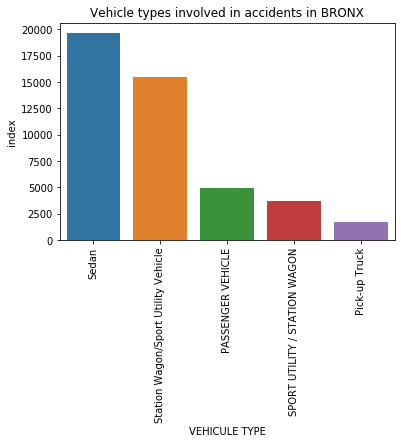

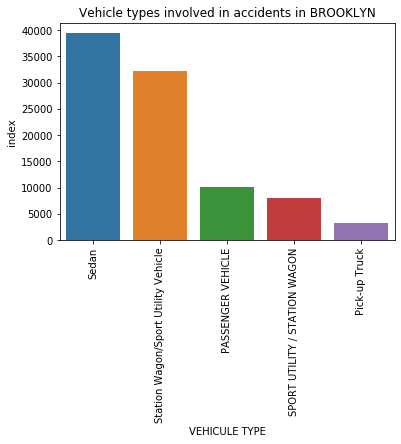

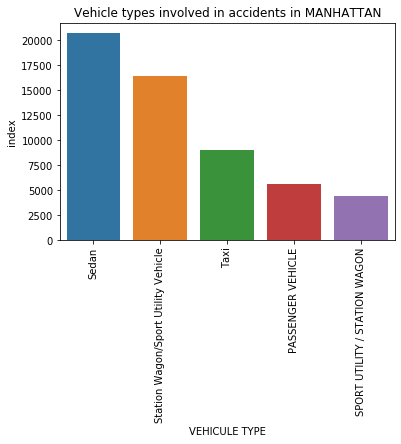

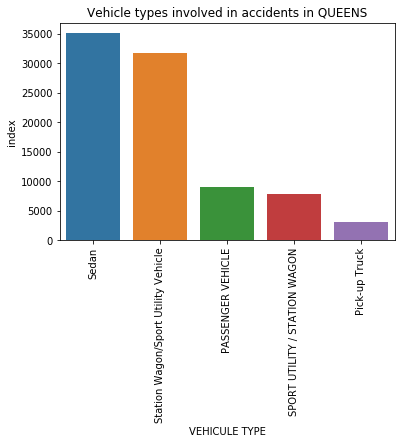

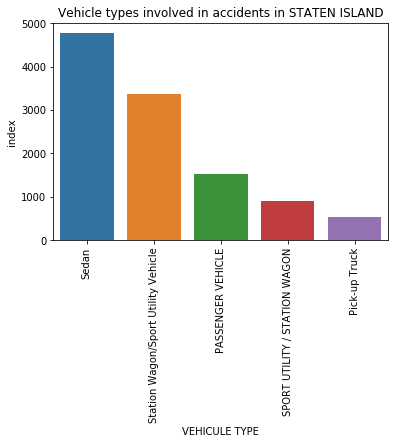

In [38]:
%%time
list_f=["VEHICLE TYPE CODE 1","VEHICLE TYPE CODE 2","VEHICLE TYPE CODE 3","VEHICLE TYPE CODE 4","VEHICLE TYPE CODE 5"]

Type=pd.DataFrame()
for f in list_f:
    Type=pd.concat([Type,df[[f,"BOROUGH"]].rename(columns={f:"VEHICULE TYPE"})])
print(type(Type))
Type=Type.reset_index()
Type=Type.groupby("BOROUGH")
FinalType=pd.DataFrame()
for name,group in Type:
    FinalType=pd.concat([FinalType,group.drop_duplicates()])
FinalType=FinalType.groupby(["BOROUGH","VEHICULE TYPE"]).count().reset_index()
FinalType.sort_values(by="index",ascending=False)

for borou in FinalType["BOROUGH"].unique().tolist():
    plt.figure()
    ax = sns.barplot(x="VEHICULE TYPE", y="index", data=FinalType[FinalType["BOROUGH"]==borou].sort_values(by="index",ascending=False).head(5))
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
    ax.set_title('Vehicle types involved in accidents in '+borou)

### Exercise 11 (15 min):

In a 2018 [interview](https://www.nytimes.com/2019/01/01/nyregion/traffic-deaths-decrease-nyc.html) with The New York Times, New York's mayor de Blasio stated that *'Vision Zero is clearly working'*. That year, the number of deaths in traffic accidents in NYC dropped to a historical 202. Yet, as reported by [am New York Metro](https://www.amny.com/news/vision-zero-de-blasio-1-30707464/), the number of fatalities has increased by 30% in the first quarter of 2019 compared to the previous year and the number of pedestrians and cyclist injured has not seen any improvement.

How would you use the provided data to understand what went wrong in the first quarter of 2019?

> - [ ] Consider the accidents of the first quarter of 2019. Then, check for the most common causes of accidents where pedestrians and cyclists were involved. Give a recommendation based solely on this information. 

> - [x] Create a pair of heatmaps of the accidents involving injured/killed pedestrians and cyclists in the first quarter of 2018 and 2019. Compare these two to see if there is any change in the concentration of accidents. In critical areas, study the type of factors involved in the accidents. Give a recommendation to visit these areas to study the problem further.    

> - [ ] The provided data is insufficient to improve our understanding of the situation.

> - [ ] None of the above. I would do the following: *here your recommended answer*.

### Exercise 12 (45 min):

Calculate the number of deaths caused by each type of vehicle. Plot a bar chart for the top 5 vehicles. Which vehicles are most often involved in deaths, and by how much more than the others?

**For example,** if two people died at an accident where 5 vehicles were involved: 4 are PASSENGER VEHICLE and 1 is a SPORT UTILITY/STATION WAGON. Then, we would add two deaths to each PASSENGER VEHICLE and SPORT UTILITY/STATION WAGON types.

**Hint:** You may want to create a new column with the total number of kills in the accident. For that you may find the function ```.to_numpy()``` useful. Then, proceed as the previous excercises to avoid double-counting the type of vehicles. 

**Answer.**

Text(0, 0.5, 'Accidents')

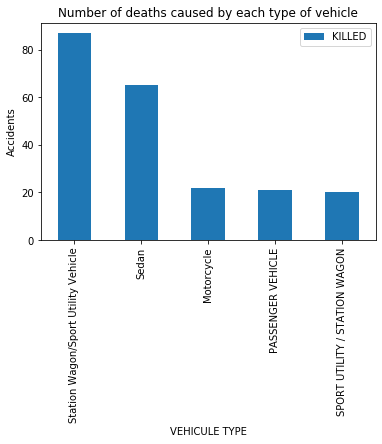

In [39]:
df["KILLED"]=df["NUMBER OF PEDESTRIANS KILLED"]+df["NUMBER OF CYCLIST KILLED"]+df["NUMBER OF MOTORIST KILLED"]
Typek=pd.DataFrame()
for f in list_f:
    #Typek=pd.concat([Typek,df[[f,"KILLED"]]])
    #Typek.join(df[[f,"KILLED"]],how="outer")
    Typek=Typek.append(df[[f,"KILLED"]].rename(columns={f:"VEHICULE TYPE"}))
Typek=Typek.dropna().reset_index()
Typek=Typek.groupby("VEHICULE TYPE")
FinalTypek=pd.DataFrame()
for name,group in Typek:
    FinalTypek=pd.concat([FinalTypek,group.drop_duplicates(subset='index')])
FinalTypek.groupby("VEHICULE TYPE").sum().sort_values(by="KILLED",ascending=False).head(5).drop("index",axis=1).plot.bar()
plt.title("Number of deaths caused by each type of vehicle")
plt.ylabel("Accidents")